# Importations

In [51]:
import pandas as pd
import sklearn

# Importation de la dataset 

Pour la logistic regression, on préfèrera le OH Encoding car le label encoding introduit un ordre entre les catégories ce qui est dangereux pour ce genre de modèle

In [52]:
df = pd.read_csv("../../dataset/prepared_data_OH.csv")

# Split entre train set et test set 

In [53]:
y = df["Engagement_Level"]
X = df.drop("Engagement_Level", axis = 1)

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [55]:
df.head()

,Views,Likes,Shares,Comments,Engagement_Level,Platform_tiktok,Platform_twitter,Platform_youtube,Content_Type_post,Content_Type_reel,...,challenge,comedy,dance,education,fashion,fitness,gaming,music,tech,viral
0,4163464,339431,53135,19346,2,1,0,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4155940,215240,65860,27239,1,0,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3666211,327143,39423,36223,1,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,917951,127125,11687,36806,0,0,0,1,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,64866,171361,69581,6376,1,1,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 1er modèle

Ici, on utilise l'apporche OVR (one versus rest) qui consiste à entrainer un modèle binaire pour chaque classe

In [56]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
OVRmodel = OneVsRestClassifier(LogisticRegression(solver='liblinear', random_state=42))

In [57]:
OVRmodel.fit(X_train, y_train)


OneVsRestClassifier(estimator=LogisticRegression(random_state=42,
                                                 solver='liblinear'))

In [58]:
OVRy_pred = OVRmodel.predict(X_test)


# 2eme modèle

In [59]:
from sklearn.linear_model import LogisticRegression

Mmodel = LogisticRegression(solver='lbfgs', max_iter=1000, random_state=42)

In [60]:
Mmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [61]:
My_pred = Mmodel.predict(X_test)

# Test

Le but est de comparer ces 2 premiers modèles, et plus tard de les comparer aux modèles suivants

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report



In [63]:
print(classification_report(y_test, OVRy_pred, target_names=["Low", "Medium", "High"]))


              precision    recall  f1-score   support

         Low       0.34      0.71      0.46       346
      Medium       0.30      0.01      0.02       320
        High       0.31      0.25      0.28       334

    accuracy                           0.33      1000
   macro avg       0.32      0.32      0.25      1000
weighted avg       0.32      0.33      0.26      1000



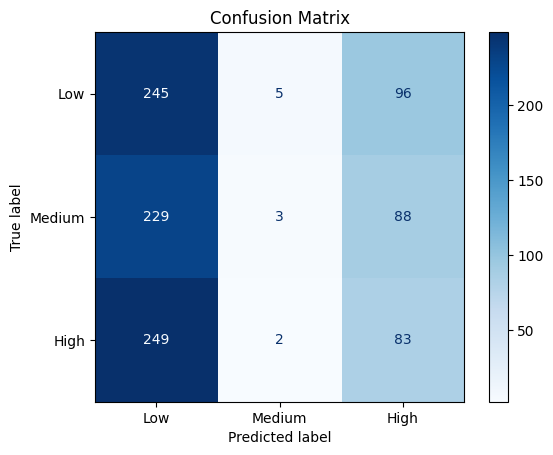

In [64]:
cm = confusion_matrix(y_test, OVRy_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


In [65]:
print(classification_report(y_test, My_pred, target_names=["Low", "Medium", "High"]))


              precision    recall  f1-score   support

         Low       0.34      0.70      0.45       346
      Medium       0.25      0.01      0.02       320
        High       0.31      0.25      0.28       334

    accuracy                           0.33      1000
   macro avg       0.30      0.32      0.25      1000
weighted avg       0.30      0.33      0.26      1000



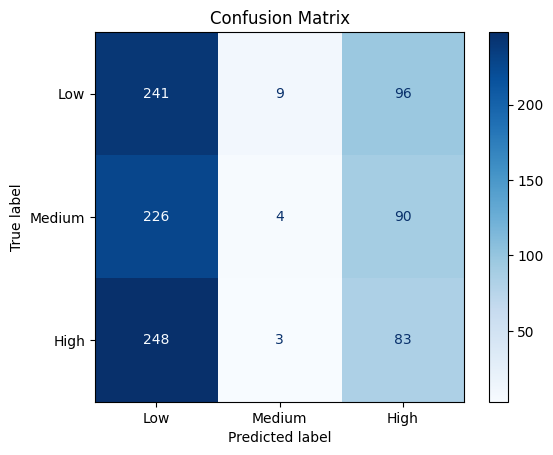

In [66]:
cm = confusion_matrix(y_test, My_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "Medium", "High"])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()


Conclusion : les 2 modèles ont des performances très similaires. 

Le recall de 0.7 sur low signifie que les modèles détectent la majorité des low, mais la précision très faible montre qu'il y a beaucoup de faux positifs. 

Globalement, les modèles semblent tout miser sur le low, pour arriver à un résultat très décevant et même pas supèrieur au hasard. Les realtions entres nos données ne sont pas linéiares, et il faudra se tourner vers des modèles plus performants. 